# 전세계 코로나 바이러스 데이터 분석하기

* 코로나 바이러스 데이터 다운로드
* https://github.com/CSSEGISandData/COVID-19 전체 데이터 다운로드


<img src="../image/world_corona.png">

# 라이브러리 로드

In [9]:
# 드라이버 로드

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 설정 

In [10]:
# 한글폰트 설정
plt.rc("font", family="D2Coding")
# - 값 나오게 설정
plt.rc("axes", unicode_minus=False)

# 파일로드

In [11]:
df = pd.read_csv(
    "../data/covid/covid_19_daily_reports/07-28-2020.csv",
    encoding="utf-8-sig",
)
df.shape  # shape : 데이터의 row, column 확인

(3932, 14)

# 미리보기

In [5]:
# 데이터 일부 확인하기

df.head(3)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-29 04:35:11,34.223334,-82.461707,269,6,0,263.0,"Abbeville, South Carolina, US",1096.750520,2.230483
1,22001.0,Acadia,Louisiana,US,2020-07-29 04:35:11,30.295065,-92.414197,2229,65,0,2164.0,"Acadia, Louisiana, US",3592.553792,2.916106
2,51001.0,Accomack,Virginia,US,2020-07-29 04:35:11,37.767072,-75.632346,1069,15,0,1054.0,"Accomack, Virginia, US",3307.958906,1.403181


In [6]:
df.tail(3)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
3929,NaN,NaN,Grand Princess,Canada,2020-07-13 12:34:33,NaN,NaN,13,0,13,0.0,"Grand Princess, Canada",NaN,0.0
3930,16061.0,Lewis,Idaho,US,2020-07-10 02:34:22,46.233153,-116.434146,1,0,0,1.0,"Lewis, Idaho, US",26.055237,0.0
3931,41069.0,Wheeler,Oregon,US,2020-07-06 19:33:59,44.726982,-120.028143,0,0,0,0.0,"Wheeler, Oregon, US",0.000000,NaN


In [7]:
# info : column 별 데이터 타입과 실제 데이터가 있는 사이즈 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3236 non-null   float64
 1   Admin2               3241 non-null   object 
 2   Province_State       3764 non-null   object 
 3   Country_Region       3932 non-null   object 
 4   Last_Update          3932 non-null   object 
 5   Lat                  3854 non-null   float64
 6   Long_                3854 non-null   float64
 7   Confirmed            3932 non-null   int64  
 8   Deaths               3932 non-null   int64  
 9   Recovered            3932 non-null   int64  
 10  Active               3928 non-null   float64
 11  Combined_Key         3932 non-null   object 
 12  Incidence_Rate       3854 non-null   float64
 13  Case-Fatality_Ratio  3882 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 430.2+ KB


In [8]:
# 기술, 통계 정보 확인하기
df[["Confirmed","Recovered","Active","Deaths"]].describe()

,Confirmed,Recovered,Active,Deaths
count,3932.000000,3.932000e+03,3.928000e+03,3932.000000
mean,4242.632248,2.469783e+03,1.410026e+03,167.694303
std,21500.731411,2.631511e+04,3.564323e+04,1212.486362
min,0.000000,0.000000e+00,-2.128252e+06,0.000000
25%,56.000000,0.000000e+00,4.600000e+01,0.000000
50%,236.500000,0.000000e+00,1.910000e+02,3.000000
75%,1166.750000,0.000000e+00,8.272500e+02,26.000000
max,487654.000000,1.355363e+06,2.177400e+05,41282.000000


In [177]:
# 3. 데이터 구성요소의 속성 확인
df.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')

In [178]:
# 속성 간 상관관계 이해하기
# corr(method = 상관계수) : 각 속성 간 상관관계 확인하기(피어슨 상관계수가 디폴트)
# 피어슨 상관계수는 일반적으로 1에 가까우면 두 feature 간의 상관관계가 높고, -1에
# 가까우면 관계가 없다고 해석됨
# print(
#     doc.corr()
# )

<AxesSubplot:>

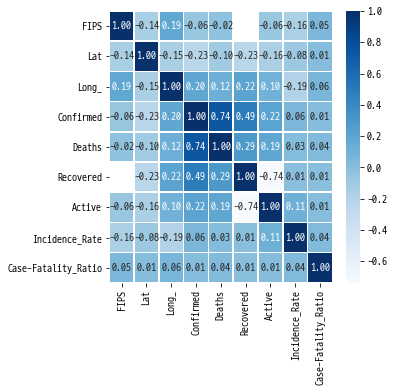

In [179]:
plt.figure(figsize=(5,5))
sns.heatmap(data=df.corr(),annot=True,fmt=".2f",linewidths=0.5,cmap="Blues")

# 데이터 전처리
## 결측치 데이터

In [180]:
# 결측치 처리

df_na = df.isnull().sum()
df_na

FIPS                   696
Admin2                 691
Province_State         168
Country_Region           0
Last_Update              0
Lat                     78
Long_                   78
Confirmed                0
Deaths                   0
Recovered                0
Active                   4
Combined_Key             0
Incidence_Rate          78
Case-Fatality_Ratio     50
dtype: int64

<AxesSubplot:>

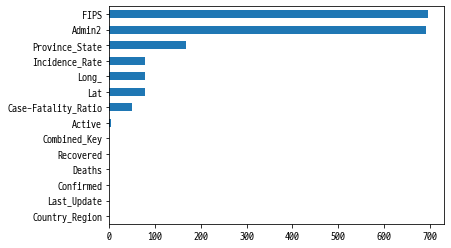

In [182]:
df_na.sort_values().plot.barh()

* 결측치 데이터 처리

### dropna() : 결측치를 가진 행을 모두 삭제

In [183]:
# 결측치 처리 전
print(df.shape)
# 결측지 삭제
df_dropna = df.dropna()
# 결측치 삭제 후
print(df_dropna.shape)

(3932, 14)
(3161, 14)


### dropna(subset=[]) : 특정 컬럼값이 없는 데이터만 삭제

In [51]:
# 결측치 처리 전 - 위에서 봤듯이 Province_State 에 결측치가 있으니 이걸 가지고 테스트
df[df["Province_State"].isnull()].head()
# 결측치 처리 후 처리된 결과를 새로운 변수에 담기
df_dropna_confirm = df.dropna(subset=["Province_State"])
# 결측치 처리 후
df_dropna_confirm[df_dropna_confirm["Province_State"].isnull()]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio


### fillna() : 특정 값으로 채우기

#### fillna(특정값) : 특정값으로 결측치를 대체

In [56]:
# 처리 전 : 어떤 데이터들이 있는지 확인하기
df[df["Province_State"].isnull()].head()
# 0으로 채우기
df_fillna_zero = df.fillna(0)
# 처리 후 확인 
df_fillna_zero[df_fillna_zero["Country_Region"] == "Albania"]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
3758,0.0,0,0,Albania,2020-07-29 04:35:11,41.1533,20.1683,4997,148,2789,2060.0,Albania,173.639586,2.961777


#### fillna({key:value}) : 특정 컬럼에 대해 특정 값으로 일괄 변경하기

In [59]:
# 실습2 - 위,경도가 null 인 데이터 채우기

# 처리 전 - 데이터 확인
df[df[["Lat","Long_"]].isnull()].head()

nan_data = {"Lat": 0,"Long_": 0}
df_fillna = df.fillna(nan_data)

df_fillna[["Lat","Long_"]]

,Lat,Long_
0,34.223334,-82.461707
1,30.295065,-92.414197
2,37.767072,-75.632346
3,43.452658,-116.241552
4,41.330756,-94.471059
...,...,...
3927,0.000000,0.000000
3928,59.796037,-158.238194
3929,0.000000,0.000000
3930,46.233153,-116.434146


## 필요한 컬럼 추출하여 상태 확인하기

In [16]:
# Country_Region(나라)  확인하기

countries = df["Country_Region"]
countries.head()

0    US
1    US
2    US
3    US
4    US
Name: Country_Region, dtype: object

In [17]:
# Country_Region 

countries.shape

(3932,)

In [19]:
# 나라들의 빈도수 확인하기

countries.value_counts()

US                     3247
Russia                   83
Japan                    49
India                    37
Colombia                 34
                       ... 
Mauritania                1
Haiti                     1
Congo (Brazzaville)       1
Uzbekistan                1
Benin                     1
Name: Country_Region, Length: 188, dtype: int64

In [185]:
print(len(countries.unique()))
countries.unique()

188


array(['US', 'Italy', 'Brazil', 'Russia', 'Mexico', 'Japan', 'Canada',
       'Colombia', 'Peru', 'Spain', 'India', 'United Kingdom', 'China',
       'Chile', 'Netherlands', 'Australia', 'Pakistan', 'Germany',
       'Sweden', 'Ukraine', 'Denmark', 'France', 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Diamond Princess', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritre

In [190]:
# 국가명, 확진자수, 사망자수, 회복자 수 컬럼만 추출하여 보기

covid_stat = df[["Country_Region","Confirmed","Deaths","Recovered"]].copy()
covid_stat

,Country_Region,Confirmed,Deaths,Recovered
0,US,269,6,0
1,US,2229,65,0
2,US,1069,15,0
3,US,7378,50,0
4,US,20,0,0
...,...,...,...,...
3927,Colombia,0,0,0
3928,US,1,0,0
3929,Canada,13,0,13
3930,US,1,0,0


In [191]:
#  특정 조건에 맞는 row 검색하기 - "Country_Region" 이 US

covid_stat_us = covid_stat[covid_stat["Country_Region"] == "US"]
covid_stat_us.head()

,Country_Region,Confirmed,Deaths,Recovered
0,US,269,6,0
1,US,2229,65,0
2,US,1069,15,0
3,US,7378,50,0
4,US,20,0,0


## group by

In [198]:
# Country_Region(국가명)으로 합쳐서 국가는 몇 개인지 알아보기

df_group = df.groupby("Country_Region")["Country_Region"].count()
len(df_group)  # 위에서 unique 값 추출했던 거랑 같아야함

188

In [212]:
# 국가명을 기준으로 '확진자수','사망자수','회복자수' 합계
df_group_info = df.groupby("Country_Region")[["Confirmed",'Deaths','Recovered']].sum()

# 국가명을 기준으로 위,경도 평균값 구하기
df_group_info1 =df.groupby("Country_Region")[["Lat","Long_"]].mean()

# 두 데이터프레임 합치기
df_merge = df_group_info.merge(df_group_info1, left_on="Country_Region", right_on="Country_Region")
df_merge

,Confirmed,Deaths,Recovered,Lat,Long_
Country_Region,,,,,
Afghanistan,36368,1270,25358,33.939110,67.709953
Albania,4997,148,2789,41.153300,20.168300
Algeria,28615,1174,19233,28.033900,1.659600
Andorra,907,52,803,42.506300,1.521800
Angola,1000,47,266,-11.202700,17.873900
...,...,...,...,...,...
West Bank and Gaza,10938,79,3752,31.952200,35.233200
Western Sahara,10,1,8,24.215500,-12.885800
Yemen,1703,484,840,15.552727,48.516388


<AxesSubplot:ylabel='Country_Region'>

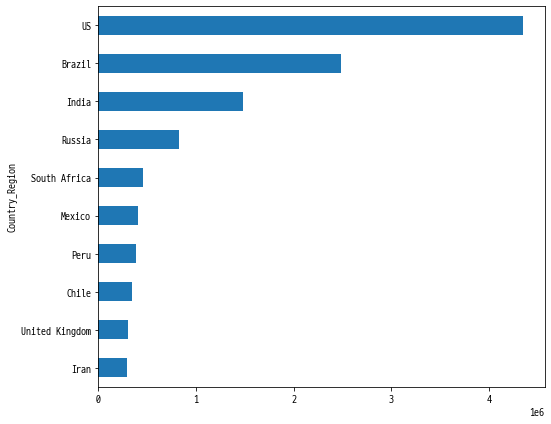

In [221]:
# 2020-07-28 날 국가별 확진자 수 top10 시각화하기

df_merge_top10 = df_merge["Confirmed"].sort_values(ascending=False).head(10)
df_merge_top10.sort_values().plot.barh(figsize=(8,7))

<AxesSubplot:xlabel='Long_', ylabel='Lat'>

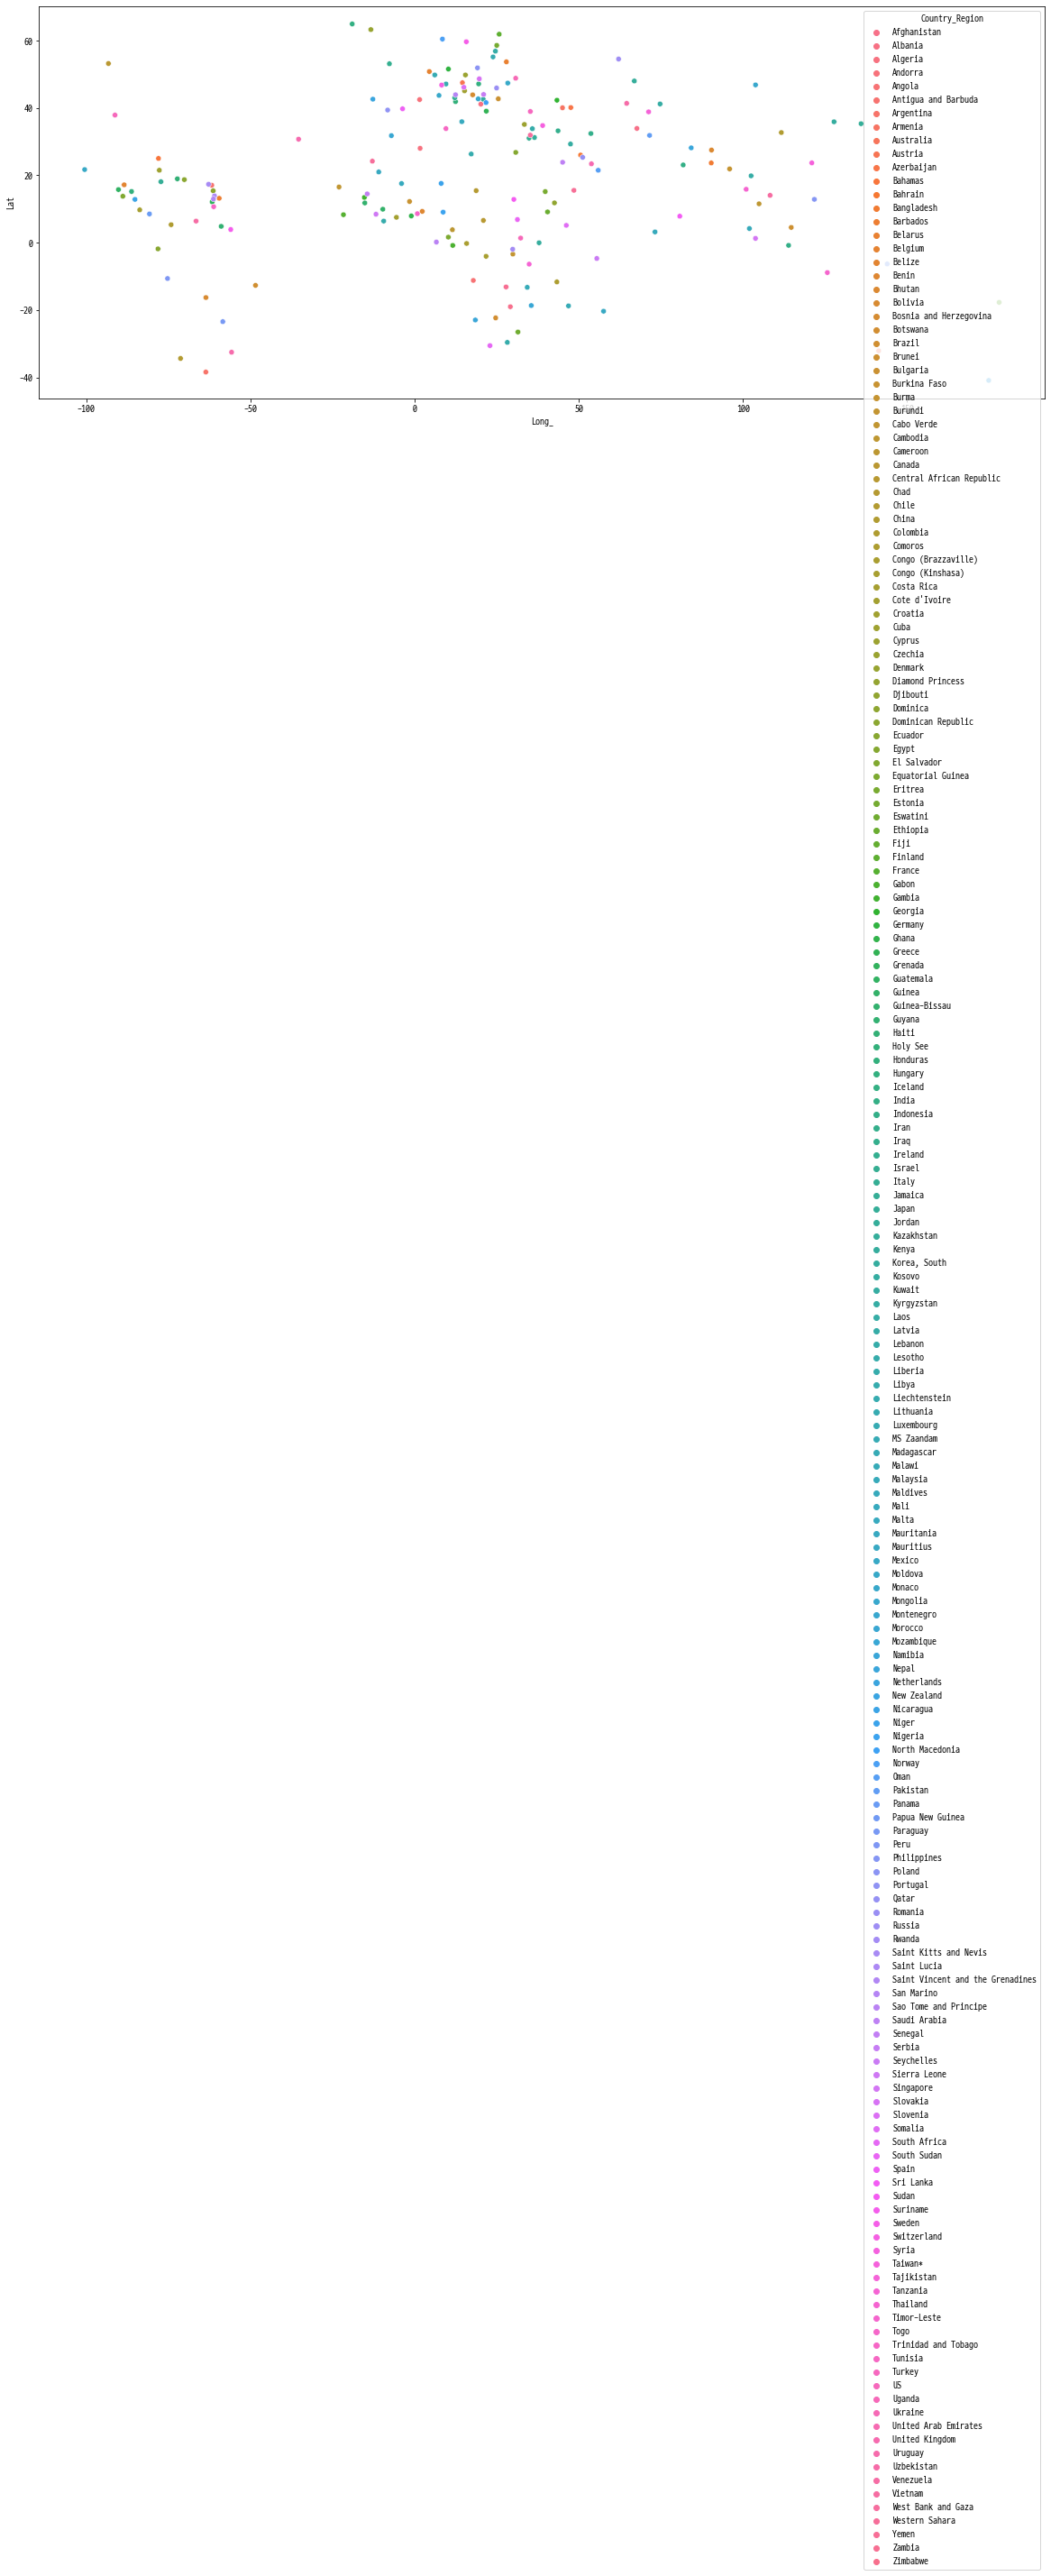

In [230]:
# 확진자가 있는 나라 시각화하기

plt.figure(figsize=(20,8))
sns.scatterplot(data=df_merge, hue="Country_Region", x="Long_", y="Lat")

<AxesSubplot:xlabel='Long_', ylabel='Lat'>

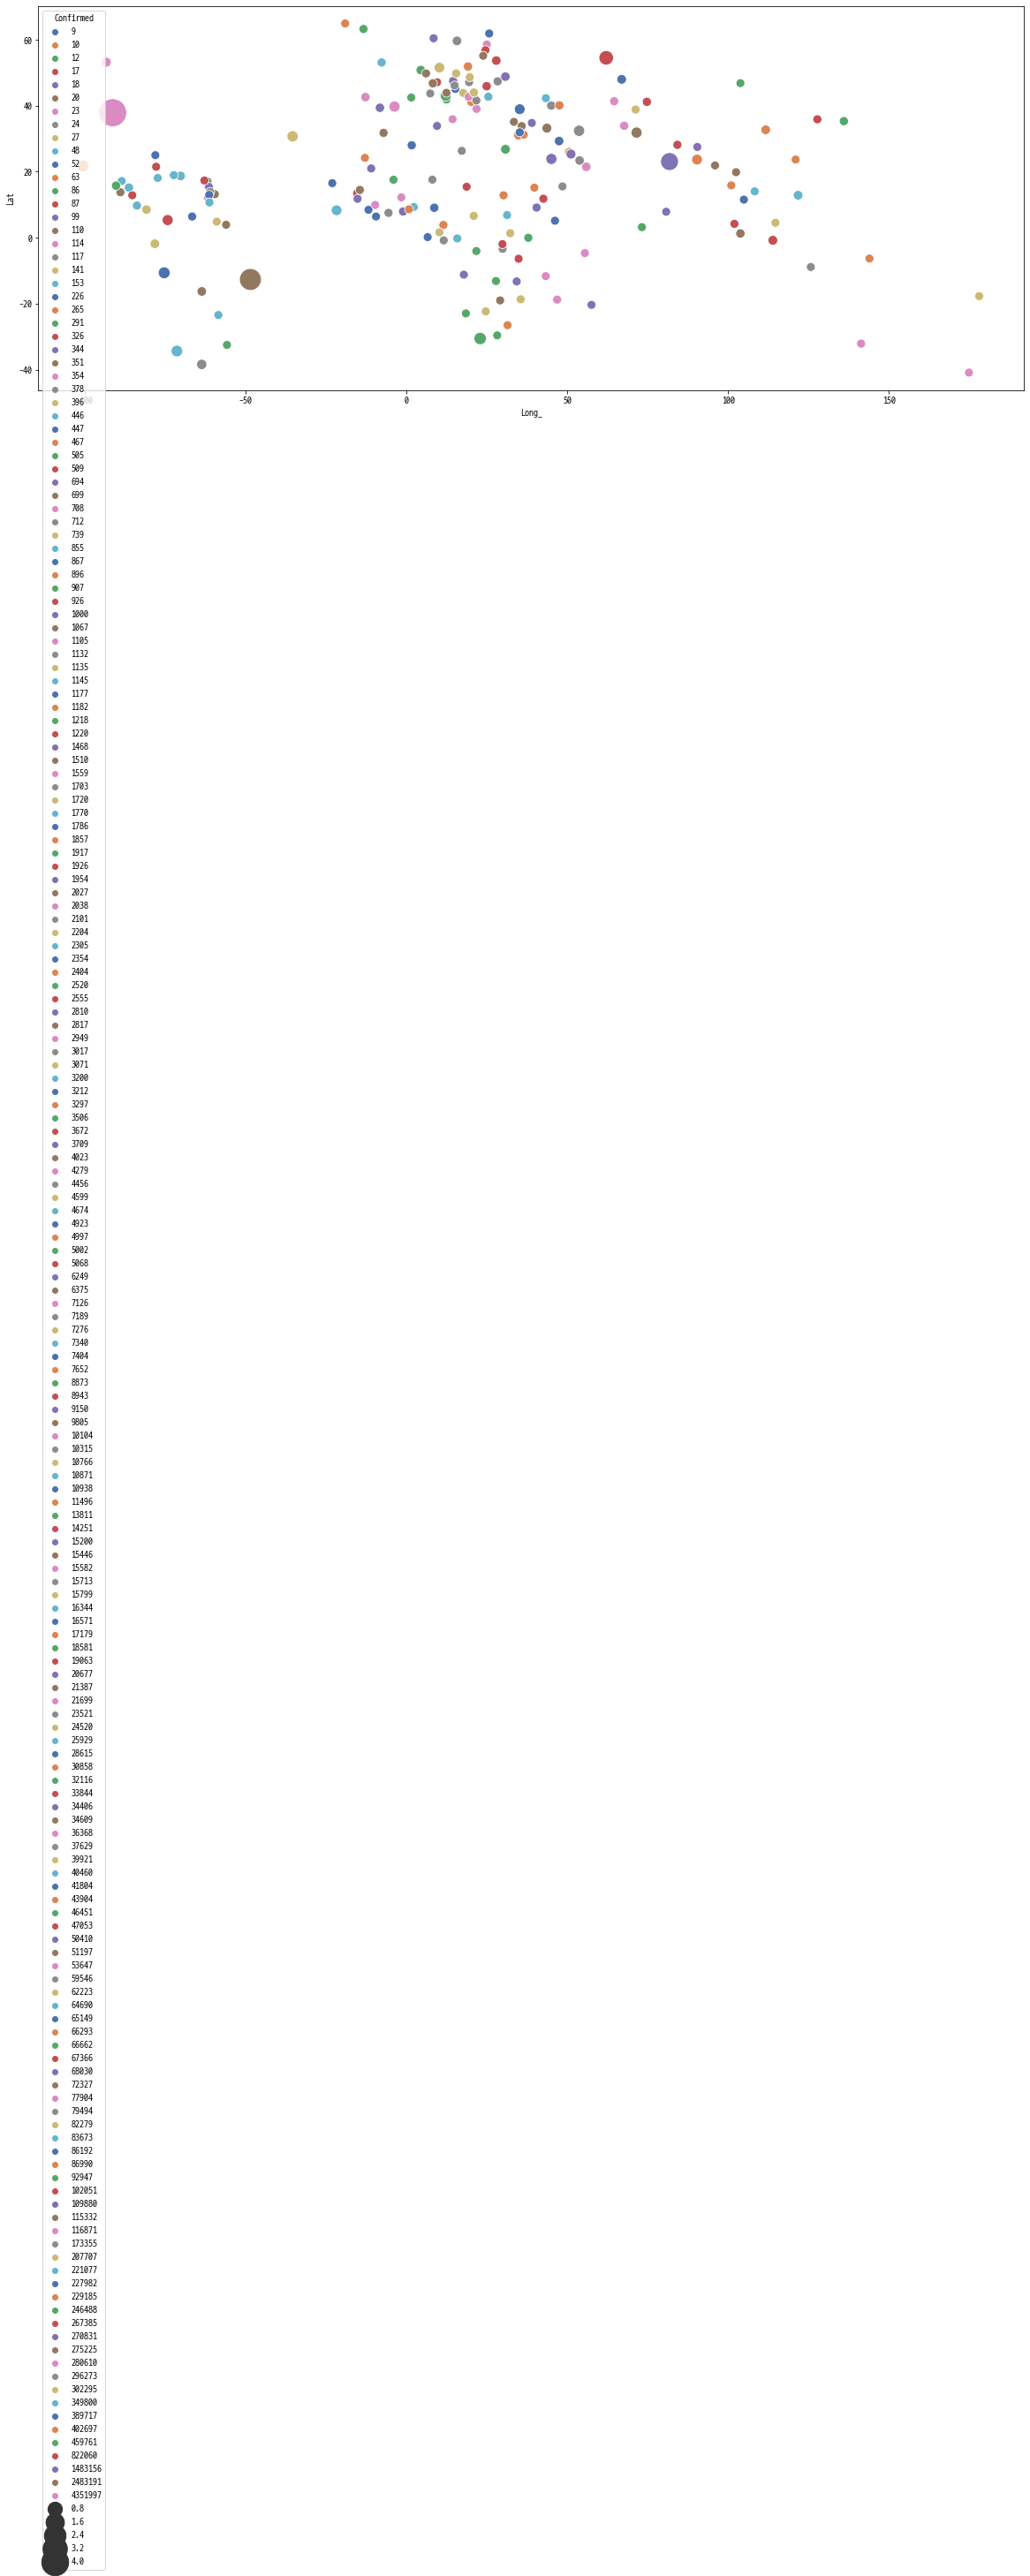

In [239]:
# 확진자수를 기반으로 크기로 나타내기

plt.figure(figsize=(20,8))
sns.scatterplot(data=df_merge, hue="Confirmed", x="Long_", y="Lat", palette="deep", size="Confirmed", sizes=(100,1000))

# 데이터 변경

## 컬럼  변경하기
* pandas 에서 데이터 타입은 dtype으로 불리우며, 주요 데이터 타입은 다음과 같음
* object는 파이썬의 str 또는 혼용 데이터 타입(문자열)
* int64 : 파이썬의 int(정수)
* float64 : 파이썬의 float(부동 소수점)
* bool : 파이썬의 bool(True / False 또는 boolean)

### 기본타입 확인하기

In [12]:
df = pd.read_csv("../data/covid/covid_19_daily_reports/01-22-2020.csv", encoding="utf-8-sig")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  35 non-null     object 
 1   Country/Region  38 non-null     object 
 2   Last Update     38 non-null     object 
 3   Confirmed       29 non-null     float64
 4   Deaths          1 non-null      float64
 5   Recovered       1 non-null      float64
dtypes: float64(3), object(3)
memory usage: 1.9+ KB


In [241]:
df[df["Confirmed"].isnull()]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN
10,Heilongjiang,Mainland China,1/22/2020 17:00,NaN,NaN,NaN
12,Hong Kong,Hong Kong,1/22/2020 17:00,NaN,NaN,NaN
15,Inner Mongolia,Mainland China,1/22/2020 17:00,NaN,NaN,NaN
18,Jilin,Mainland China,1/22/2020 17:00,NaN,NaN,NaN
22,Qinghai,Mainland China,1/22/2020 17:00,NaN,NaN,NaN
23,Shaanxi,Mainland China,1/22/2020 17:00,NaN,NaN,NaN
30,Tibet,Mainland China,1/22/2020 17:00,NaN,NaN,NaN
32,Xinjiang,Mainland China,1/22/2020 17:00,NaN,NaN,NaN


* astype("원하는 타입") vs to_numeric()

* astype() : NaN 이 있는 경우 타입 변환시 에러남
* to_numeric() : 수치형 타입으로 변환함(NaN 이 들어 있는 경우 float64로 무조건 변경)

In [242]:
# Confirmed 타입의 float64 인데 int64로 변경

# astype()의 경우 NaN이 들어 있으면 에러 남
# df["Confirmed"].astype("int64")


# NaN 을 제거 후 타입변경하기
df_dropna = df.dropna(subset=["Confirmed"])
df_dropna = df_dropna.astype({"Confirmed":"int64"})
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 37
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  26 non-null     object 
 1   Country/Region  29 non-null     object 
 2   Last Update     29 non-null     object 
 3   Confirmed       29 non-null     int64  
 4   Deaths          1 non-null      float64
 5   Recovered       1 non-null      float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.6+ KB


In [243]:
# 특정 컬럼 추출하여 컬럼명 변경하기

df_extract = df[["Country/Region","Confirmed"]]
df_extract.head()

,Country/Region,Confirmed
0,Mainland China,1.0
1,Mainland China,14.0
2,Mainland China,6.0
3,Mainland China,1.0
4,Mainland China,NaN


In [244]:
# 방법 1 : 전체를 지정하는 방법

df_extract.columns = [["Country_Region","Confirmed"]]
df_extract.head()

,Country_Region,Confirmed
0,Mainland China,1.0
1,Mainland China,14.0
2,Mainland China,6.0
3,Mainland China,1.0
4,Mainland China,NaN


In [245]:
# 방법 2 - df_extract 다시 실행하고 하기

df_extract = df_extract.rename(columns={"Country/Region":"Country_Region"})
df_extract.columns

MultiIndex([('Country_Region',),
            (     'Confirmed',)],
           )

<hr style="border-color:red;border-width:3px">

### 중복 데이터 처리하기 - UID_ISO_FIPS_LookUp_Table.csv

* duplicated() : 중복 행 확인하기

In [13]:
doc = pd.read_csv("../data/covid/UID_ISO_FIPS_LookUp_Table.csv", encoding="utf-8-sig")
doc = doc[["iso2","Country_Region",]]
doc[doc.duplicated()]  # 중복 행  

,iso2,Country_Region
23,BR,Brazil
24,BR,Brazil
25,BR,Brazil
26,BR,Brazil
27,BR,Brazil
...,...,...
4148,US,US
4149,US,US
4150,US,US
4151,US,US


In [247]:
doc.drop_duplicates?

In [248]:
doc = doc.drop_duplicates(subset="Country_Region",keep="last")
doc["Country_Region"].value_counts()

Taiwan          1
Togo            1
South Africa    1
Cameroon        1
China           1
               ..
Venezuela       1
Maldives        1
Israel          1
Paraguay        1
Mali            1
Name: Country_Region, Length: 188, dtype: int64